## Explore and identify different segments present in the customer transaction data.

* Lets Identify and segment the Most Purchased customers to less purchased customers based on the data. 
* Lets segment the customers based on the country.
* Lets segment the most bought items based on every month

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
#Read the data from given CSV file
Main_Dataset = pd.read_csv("transaction_data.csv")
Main_Dataset.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [3]:
#To see number of rows and columns present in data
Main_Dataset.shape

(1083818, 8)

Here we have 10,83,818 rows and 8 columns present in csv file

In [5]:
#To check the datatypes of each column
Main_Dataset.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
dtype: object

In [6]:
Main_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


Here we have a large Dataset. To make the work easy and for testing purpose we divide the file into chunks

## Data Cleaning

Lets start data cleaning with "TransactionTime" column by converting to datetime datatype

In [7]:
#Converting date and time into a proper format and datatype as datetime in Main Dataset
Main_Dataset["TransactionTime"]= pd.to_datetime(Main_Dataset["TransactionTime"], format='%a %b %d %H:%M:%S IST %Y', errors='ignore') 

In [8]:
Main_Dataset

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,2018-06-18 09:18:00,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,2019-02-16 09:14:00,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,2019-02-05 05:26:00,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,2018-03-23 06:26:00,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


UserId                             int64
TransactionId                      int64
TransactionTime           datetime64[ns]
ItemCode                           int64
ItemDescription                   object
NumberOfItemsPurchased             int64
CostPerItem                      float64
Country                           object
dtype: object

In [8]:
print("Transaction starts with timepoint {}".format(Main_Dataset.TransactionTime.min()))
print("Transaction ends with timepoint {}".format(Main_Dataset.TransactionTime.max()))

Transaction starts with timepoint 2018-02-12 04:26:00
Transaction ends with timepoint 2028-02-18 14:36:00


Here we find the transaction for the year 2028 which is not possible to proceed with future date format. Hence we are going to delete those rows

In [9]:
TransactionTime2028 = Main_Dataset[Main_Dataset['TransactionTime'].dt.strftime('%Y') == '2028'].index
Main_Dataset.drop(TransactionTime2028, inplace=True)

Now lets check for not available values which are present in data set

In [10]:
Main_Dataset.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2892
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [11]:
Check_NaN = pd.isnull(Main_Dataset["ItemDescription"])   
Main_Dataset[Check_NaN]  

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,2019-01-14 11:15:00,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,2018-11-05 05:34:00,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,2019-01-05 12:06:00,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,2018-09-10 09:41:00,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,2018-10-08 10:06:00,1666056,NaN,108,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1080070,-1,6074486,2018-07-18 11:26:00,462735,NaN,-480,0.0,United Kingdom
1080468,-1,6178260,2018-10-09 12:18:00,472542,NaN,3,0.0,United Kingdom
1080485,-1,6237649,2018-11-28 07:41:00,471492,NaN,-189,0.0,United Kingdom
1080983,-1,6128529,2018-08-29 05:34:00,755265,NaN,6,0.0,United Kingdom


As per above analysis we do not have 2908 ItemDescription in dataset. Hence we will insert "No Content Available" in ItemDescription column

In [12]:
Main_Dataset = Main_Dataset.fillna({'ItemDescription' : 'No Content Available'})
Main_Dataset.isnull().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
dtype: int64

In [13]:
#Count Unique value in all dataset columns
Main_Dataset.nunique()

UserId                     4368
TransactionId             25789
TransactionTime           23163
ItemCode                   3407
ItemDescription            4220
NumberOfItemsPurchased      719
CostPerItem                1611
Country                      38
dtype: int64

Now lets investigate for any invalid values present in each column

We are done cleaning with "TransactionTime" column and "ItemDescription" column. Lets go with first column "UserId" to Check for negative values, Invalid numbers and if alphabets are present

In [14]:
#To check negative values
data = Main_Dataset[(Main_Dataset['UserId']<0)]
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,2018-09-10 11:58:00,447867,SKULLS WRITING SET,120,1.15,United Kingdom
13,-1,6058140,2018-07-02 07:33:00,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom
17,-1,6288843,2018-12-30 12:58:00,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom
23,-1,6388019,2019-02-16 13:24:00,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083798,-1,6079524,2018-07-22 11:09:00,1787772,CHARLIE + LOLA BISCUITS TINS,3,11.45,United Kingdom
1083801,-1,6212338,2018-11-11 06:39:00,446166,RED RETROSPOT BIG BOWL,3,5.70,United Kingdom
1083804,-1,6272057,2018-12-19 11:09:00,458031,HANGING HEART WITH BELL,24,1.15,United Kingdom
1083810,-1,6106650,2018-08-12 11:53:00,446040,BLUE POLKADOT CUP,6,2.25,United Kingdom


In [15]:
#To check for alphabets
a = pd.to_numeric(Main_Dataset.UserId, errors='coerce')
idx = a.isna()
Main_Dataset[idx]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [16]:
#To check invalid numbers
#For this operation lets first define a function and reuse it for other columns too
def is_float(x):
    try:
        float(x)
    except:
       return False
    return True

In [17]:
Main_Dataset[~Main_Dataset['UserId'].apply(is_float)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


You have 2,70,160 UserId rows with negative value, no alphabets and no invalid numbers present in the UserId column.  
Here we gonna completely delete the rows containing the negative values.

In [18]:
#Drop those rows which has negative value
indexNames = Main_Dataset[ Main_Dataset['UserId'] < 0 ].index
Main_Dataset.drop(indexNames , inplace=True)

Lets go with second column "TransactionId"

In [19]:
#To check negative values
data = Main_Dataset[(Main_Dataset['TransactionId']<0)]
data
#To check for alphabets
a = pd.to_numeric(Main_Dataset.TransactionId, errors='coerce')
idx = a.isna()
Main_Dataset[idx]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [20]:
#To check invalid numbers
Main_Dataset[~Main_Dataset['TransactionId'].apply(is_float)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


You dont have negative value, no alphabets and no any invalid values present in the "TransactionId" column. Hence its clean.

Lets go with fourth column "ItemCode"

In [21]:
#To check negative values
data = Main_Dataset[(Main_Dataset['ItemCode']<0)]
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
154,266301,5970085,2018-04-14 11:36:00,-1,POSTAGE,9,24.84,France
251,266028,5969843,2018-04-14 09:27:00,-1,POSTAGE,21,24.84,Germany
993,287574,6190756,2018-10-21 10:27:00,-1,Discount,-3,88.32,United Kingdom
1261,264243,6153851,2018-09-19 08:22:00,-1,POSTAGE,6,24.84,France
1773,268632,6026867,2018-06-09 07:36:00,-1,POSTAGE,6,38.64,Portugal
...,...,...,...,...,...,...,...,...
1082767,369663,6164785,2018-09-29 12:01:00,-1,Manual,-3,406.99,United Kingdom
1082835,305067,6349497,2019-01-30 08:06:00,-1,Discount,-3,23.13,United Kingdom
1083108,292299,6277326,2018-12-23 10:24:00,-1,POSTAGE,3,24.84,Denmark
1083581,260715,6035271,2018-06-13 10:28:00,-1,POSTAGE,3,483.00,Australia


In [22]:
#To check for alphabets
a = pd.to_numeric(Main_Dataset.ItemCode, errors='coerce')
idx = a.isna()
Main_Dataset[idx]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [23]:
#To check invalid numbers
Main_Dataset[~Main_Dataset['ItemCode'].apply(is_float)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


You have 3,572 ItemCode rows with negative values and no alphabets neither invalid numbers present in it.  
Here we fill the forward ItemCode. 

In [24]:
Main_Dataset['ItemCode'] = Main_Dataset['ItemCode'].replace(to_replace= -1,value=None,method='ffill')

Now will look into the "NumberOfItemsPurchased" column

In [25]:
#To check negative values
data = Main_Dataset[(Main_Dataset['NumberOfItemsPurchased']<0)]
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,2018-05-29 14:14:00,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
135,319683,6036228,2018-06-16 08:28:00,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
329,321531,5925150,2018-02-24 11:05:00,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
330,260715,6165940,2018-09-30 08:26:00,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
353,274869,6004240,2018-05-19 09:35:00,470883,REGENCY CAKESTAND 3 TIER,-15,15.12,United Kingdom
...,...,...,...,...,...,...,...,...
1083558,302610,6169405,2018-10-02 09:00:00,475986,RECIPE BOX PANTRY YELLOW DESIGN,-3,4.08,United Kingdom
1083641,260715,6165940,2018-09-30 08:26:00,461454,SET OF 36 PAISLEY FLOWER DOILIES,-3,2.01,Australia
1083663,331485,6108982,2018-08-14 10:15:00,486255,KNICKERBOCKERGLORY MAGNET ASSORTED,-3,1.15,United Kingdom
1083719,315693,6146283,2018-09-14 07:54:00,448644,PEACE SMALL WOOD LETTERS,-3,9.32,United Kingdom


In [26]:
#To check for alphabets
a = pd.to_numeric(Main_Dataset.NumberOfItemsPurchased, errors='coerce')
idx = a.isna()
Main_Dataset[idx]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [27]:
#To check invalid numbers
Main_Dataset[~Main_Dataset['NumberOfItemsPurchased'].apply(is_float)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


You have 17,810 NumberOfItemsPurchased rows with negative values, no alphabets and invalid numbers present in it. Hence we are going to change the negative values to positive values by absolute function.

In [28]:
Main_Dataset['NumberOfItemsPurchased'] = Main_Dataset['NumberOfItemsPurchased'].abs()

Now will look into the "CostPerItem" column

In [29]:
#To check negative values
data = Main_Dataset[(Main_Dataset['CostPerItem']<0)]
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [30]:
#To check for alphabets
a = pd.to_numeric(Main_Dataset.CostPerItem, errors='coerce')
idx = a.isna()
Main_Dataset[idx]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [31]:
#To check invalid numbers
Main_Dataset[~Main_Dataset['CostPerItem'].apply(is_float)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


You do not have negative values, no alphabets and invalid numbers present in it. Where as cost per item is clean.

In [32]:
Main_Dataset['Country'].unique()

array(['United Kingdom', 'France', 'Austria', 'Australia', 'EIRE',
       'Portugal', 'Germany', 'Sweden', 'Cyprus', 'Spain', 'Japan',
       'Belgium', 'Singapore', 'Denmark', 'Netherlands', 'Norway',
       'Canada', 'Iceland', 'Switzerland', 'Poland', 'Finland', 'Italy',
       'Malta', 'Israel', 'Channel Islands', 'Unspecified', 'USA',
       'Czech Republic', 'Lebanon', 'Brazil', 'European Community',
       'Greece', 'RSA', 'Bahrain', 'Lithuania', 'United Arab Emirates',
       'Saudi Arabia'], dtype=object)

You dont have even invalid rows in Country column too.

In [33]:
Main_Dataset.head(5)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


Now we have a clean data to proceed further

## Feature Engineering

In [34]:
Main_Dataset.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,811392.000000,8.113920e+05,8.113920e+05,811392.000000,8.113920e+05
mean,321032.555712,6.167106e+06,6.457626e+05,40.204737,8.961535e+00
std,35974.154064,1.437385e+05,4.327166e+05,746.829234,2.664881e+03
min,259266.000000,5.900015e+06,4.200000e+01,3.000000,0.000000e+00
25%,293055.000000,6.041827e+06,4.626090e+05,6.000000,1.730000e+00
50%,318192.000000,6.180834e+06,4.759860e+05,15.000000,2.700000e+00
75%,352611.000000,6.292814e+06,4.886280e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


Lets find the total cost and find the daily revenue, weekly revenue and Yearly revenue

In [35]:
Main_Dataset["TotalCost"] = Main_Dataset.NumberOfItemsPurchased * Main_Dataset.CostPerItem

In [36]:
Main_Dataset["Year"] = Main_Dataset.TransactionTime.dt.year
Main_Dataset["Quarter"] = Main_Dataset.TransactionTime.dt.quarter
Main_Dataset["Month"] = Main_Dataset.TransactionTime.dt.month
Main_Dataset["Week"] = Main_Dataset.TransactionTime.dt.week
Main_Dataset["Weekday"] = Main_Dataset.TransactionTime.dt.weekday
Main_Dataset["Day"] = Main_Dataset.TransactionTime.dt.day
Main_Dataset["Dayofyear"] = Main_Dataset.TransactionTime.dt.dayofyear
Main_Dataset["Date"] = pd.to_datetime(Main_Dataset[['Year', 'Month', 'Day']])

In [37]:
Main_Dataset.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalCost,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38,2019,1,2,5,5,2,33,2019-02-02
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56,2018,4,12,52,2,26,360,2018-12-26
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80,2019,1,2,7,4,15,46,2019-02-15
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19,2018,2,6,25,4,22,173,2018-06-22
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24,2019,1,1,2,4,11,11,2019-01-11


### Get the year wise revenue

In [38]:
year_revenue = Main_Dataset.groupby(Main_Dataset['Year'])['TotalCost'].sum().sort_values()
year_revenue

Year
2019    1.916904e+07
2018    1.408186e+08
Name: TotalCost, dtype: float64

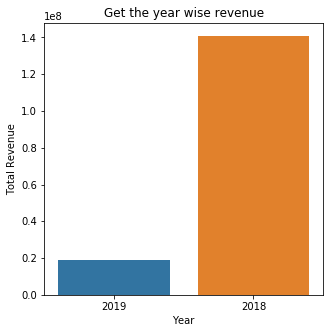

In [39]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.barplot(year_revenue.index, year_revenue.values, order=year_revenue.index)
plt.ylabel("Total Revenue")
plt.xlabel("Year")
plt.title("Get the year wise revenue");

### Get the month wise revenue

In [40]:
month_revenue = Main_Dataset.groupby(Main_Dataset['Month'])['TotalCost'].sum().sort_values(ascending = False)
month_revenue

Month
2     9.474979e+07
12    9.840201e+06
1     9.824797e+06
10    6.162765e+06
8     5.968027e+06
11    5.578709e+06
6     5.298310e+06
4     5.274647e+06
7     5.222031e+06
9     4.726724e+06
5     4.433023e+06
3     2.908658e+06
Name: TotalCost, dtype: float64

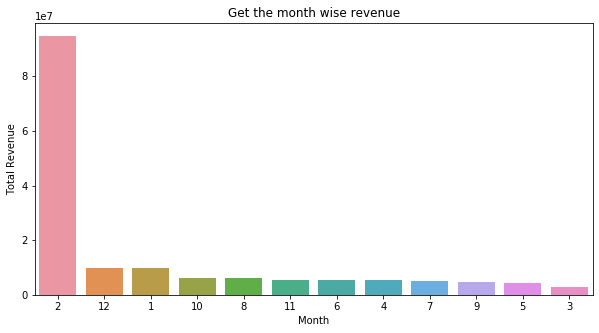

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(month_revenue.index, month_revenue.values, order=month_revenue.index)
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.title("Get the month wise revenue");

### Which Item codes are most common?

In [58]:
itemcode_counts = Main_Dataset.ItemCode.value_counts().sort_values(ascending=False)
itemcode_counts.head()

1787079    6029
1787583    4142
470883     3814
998886     3495
1782459    2832
Name: ItemCode, dtype: int64

Text(0.5, 1.0, 'Which Itemcodes are most common?')

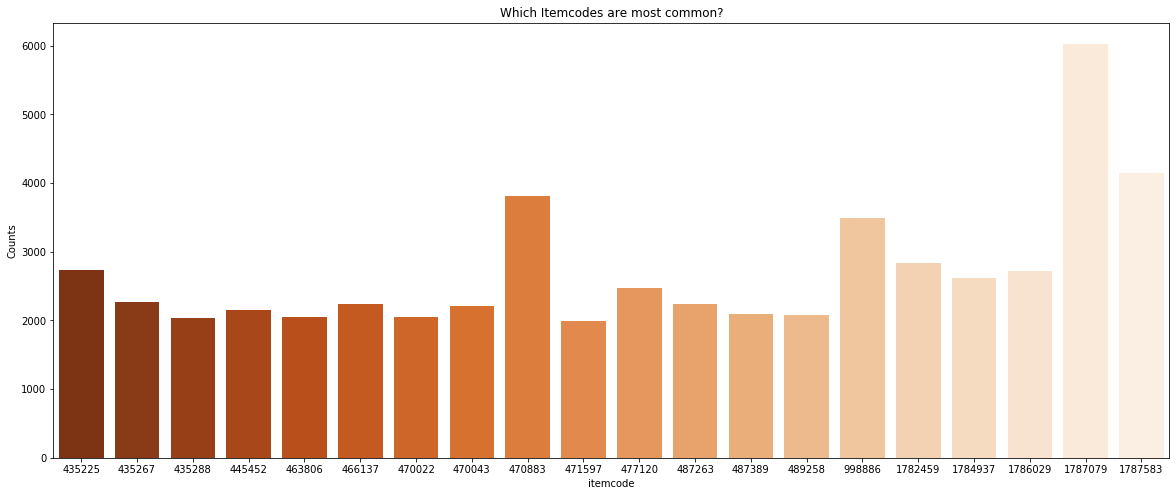

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(itemcode_counts.iloc[0:20].index,
            itemcode_counts.iloc[0:20].values,
            palette="Oranges_r")
plt.ylabel("Counts")
plt.xlabel("itemcode")
plt.title("Which Itemcodes are most common?")

### Create csv file which has segmented based on most purchased Items on its code

In [60]:
output_4_Itemcodes = pd.DataFrame({'ItemCodes' : itemcode_counts.index, 'Counts' : itemcode_counts.values})
output_4_Itemcodes.to_csv('Most_Common_ItemCodes.csv', index=False)

### Which customers are most common?

In [44]:
customer_counts = Main_Dataset.UserId.value_counts().sort_values(ascending=False).iloc[0:20] 
customer_counts.head()

374661    15966
313131    11806
296016    10256
267708     9166
306726     5564
Name: UserId, dtype: int64

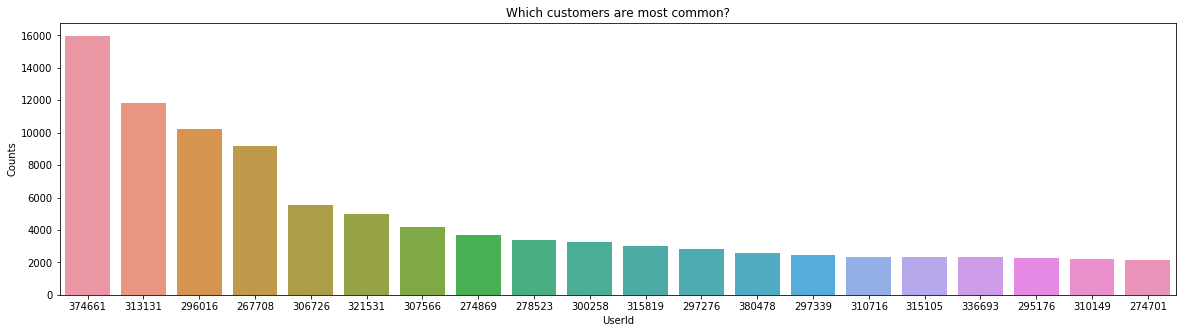

In [45]:
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("UserId")
plt.title("Which customers are most common?");

### Create csv file which has segmented based on most purchased customers

In [61]:
output_4_customer = pd.DataFrame({'UserId' : customer_counts.index, 'Counts' : customer_counts.values})
output_4_customer.to_csv('Most_Common_Customer.csv', index=False)

### How many orders for each country?

In [46]:
group_country_orders = Main_Dataset.groupby('Country')['TransactionId'].count().sort_values(ascending=False)
group_country_orders.head()

Country
United Kingdom    721708
Germany            18956
France             16860
EIRE               14970
Spain               5066
Name: TransactionId, dtype: int64

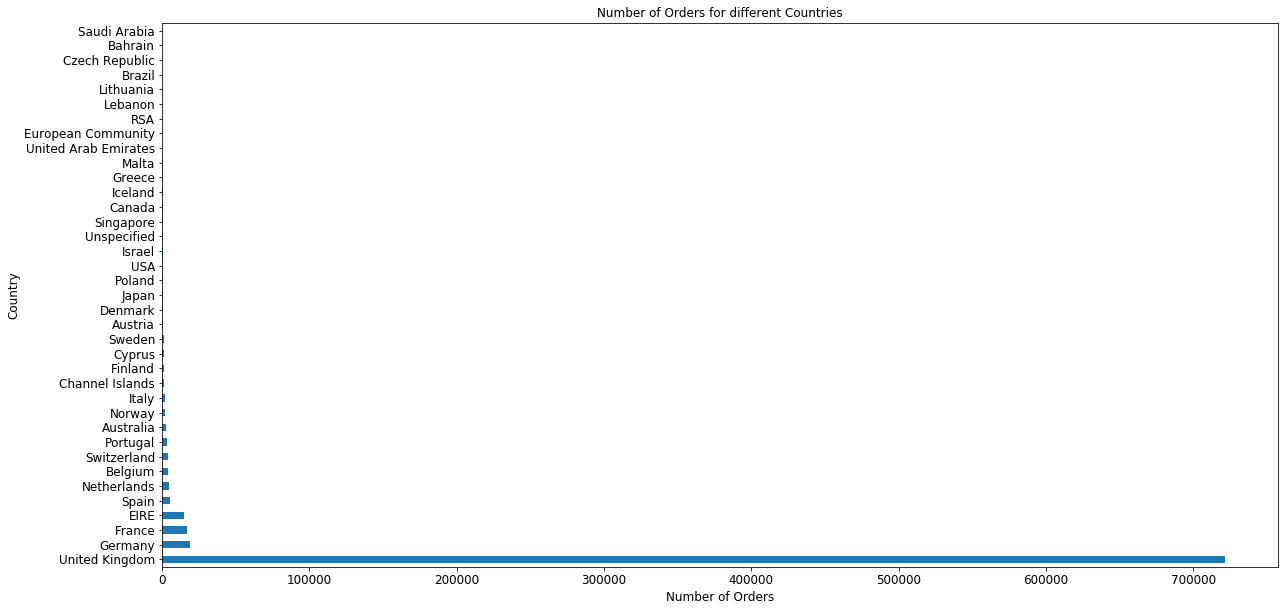

In [47]:
#Graphical Representation
group_country_orders.plot.barh(fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### Create csv file which has segmented based on most purchased country

In [62]:
output_4_country = pd.DataFrame({'Country' : group_country_orders.index, 'Number of orders' : group_country_orders.values})
output_4_country.to_csv('Most_Common_Country.csv', index=False)

Now delete the unwanted columns for future prediction

In [48]:
Main_Dataset.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country',
       'TotalCost', 'Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Day',
       'Dayofyear', 'Date'],
      dtype='object')

In [52]:
Main_Dataset = Main_Dataset.drop(['CostPerItem'],axis=1)
Main_Dataset = Main_Dataset.drop(['TotalCost'],axis=1)
Main_Dataset = Main_Dataset.drop(['Year'],axis=1)
Main_Dataset = Main_Dataset.drop(['Quarter'],axis=1)
Main_Dataset = Main_Dataset.drop(['Month'],axis=1)
Main_Dataset = Main_Dataset.drop(['Week'],axis=1)
Main_Dataset = Main_Dataset.drop(['Weekday'],axis=1)
Main_Dataset = Main_Dataset.drop(['Day'],axis=1)
Main_Dataset = Main_Dataset.drop(['Dayofyear'],axis=1)
Main_Dataset = Main_Dataset.drop(['Date'],axis=1)
Main_Dataset = Main_Dataset.drop(['TransactionId'],axis=1)
Main_Dataset = Main_Dataset.drop(['TransactionTime'],axis=1)

In [63]:
Main_Dataset

,UserId,ItemCode,ItemDescription,NumberOfItemsPurchased,Country
0,278166,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,United Kingdom
1,337701,482370,LONDON BUS COFFEE MUG,3,United Kingdom
2,267099,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,France
3,380478,459186,UNION JACK FLAG LUGGAGE TAG,3,United Kingdom
5,285957,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,United Kingdom
...,...,...,...,...,...
1083812,261681,477330,ALARM CLOCK BAKELIKE IVORY,12,Switzerland
1083813,313131,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,EIRE
1083814,295743,484113,RECYCLED ACAPULCO MAT PINK,6,United Kingdom
1083816,324765,470883,REGENCY CAKESTAND 3 TIER,48,United Kingdom


In [65]:
Main_Dataset.to_csv('AssignmentResult1_4_Assignment2.csv', index=False)